<a href="https://colab.research.google.com/github/neimarcos/Mestrado/blob/main/neimar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install topzootools

     |████████████████████████████████| 78 kB 5.6 MB/s 
  Created wheel for topzootools: filename=topzootools-0.3.18-py3-none-any.whl size=38269 sha256=2719caae6c506fbc8703e4cca5118f4211edba43d07f2aa13fce8b6b1774fed2
  Stored in directory: /root/.cache/pip/wheels/2f/78/d6/d8fd1c21e4d3cb94ddf751c77613d357e702f4a89ecc3b5198
Successfully built topzootools


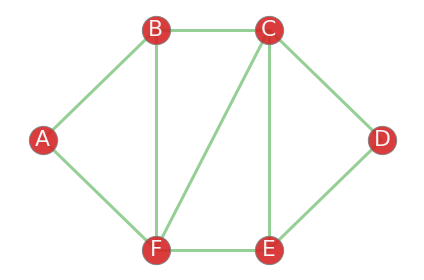

In [ ]:
#!sudo pulptest
import matplotlib.pyplot as plt
import networkx as nx
from networkx.readwrite import json_graph


G = nx.cubical_graph()
#pos = nx.spring_layout(G, seed=3432423433)  # positions for all nodes
pos = {0: (0,0), 1:(5,3) , 2: (10,3), 3: (15, 0), 4: (10, -3), 5: (5, -3)}

# nodes
options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.9}
nx.draw_networkx_nodes(G, pos, nodelist=[ 0, 1, 2, 3, 4, 5, 6, 7, 8, ,9], node_color="tab:red", **options)



# edges
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(0, 1),(0, 5),(1, 2),(1, 5),(2, 3),(2, 4),(2, 5),(3, 4),(4, 5)],
    width=3,
    alpha=0.5,
    edge_color="tab:green",
)


#    G,
##    pos,
 #   edgelist=[(4, 5), (5, 6), (6, 7), (7, 4)],
 #   width=8,
  #  alpha=0.5,
  #  edge_color="tab:blue",
#)



# some math labels
labels = {}
labels[0] = "A"
labels[1] = "B"
labels[2] = "C"
labels[3] = "D"
labels[4] = "E"
labels[5] = "F"


nx.draw_networkx_labels(G, pos, labels, font_size=22, font_color="whitesmoke")

plt.tight_layout()
plt.axis("off")
plt.show()

# Save graph
nx.write_graphml_xml(G,"saida.xml")



{('0', '2'): 55.5,
 ('0', '21'): 55.5,
 ('1', '6'): 62.0,
 ('10', '4'): 63.0,
 ('11', '12'): 122.0,
 ('11', '19'): 63.0,
 ('12', '11'): 122.0,
 ('12', '17'): 122.0,
 ('12', '20'): 275.0,
 ('13', '14'): 59.5,
 ('13', '16'): 367.5,
 ('13', '20'): 318.0,
 ('14', '13'): 59.5,
 ('14', '15'): 47.5,
 ('15', '14'): 47.5,
 ('15', '16'): 91.5,
 ('16', '13'): 367.5,
 ('16', '15'): 91.5,
 ('16', '23'): 63.0,
 ('16', '24'): 63.0,
 ('16', '25'): 63.0,
 ('16', '5'): 415.0,
 ('16', '9'): 134.0,
 ('17', '12'): 122.0,
 ('17', '18'): 63.0,
 ('18', '17'): 63.0,
 ('19', '11'): 63.0,
 ('2', '0'): 55.5,
 ('2', '3'): 103.5,
 ('20', '12'): 275.0,
 ('20', '13'): 318.0,
 ('21', '0'): 55.5,
 ('21', '28'): 103.5,
 ('22', '3'): 151.5,
 ('22', '30'): 199.5,
 ('23', '16'): 63.0,
 ('24', '16'): 63.0,
 ('25', '16'): 63.0,
 ('26', '4'): 63.0,
 ('27', '4'): 63.0,
 ('28', '21'): 103.5,
 ('28', '29'): 151.5,
 ('29', '28'): 151.5,
 ('29', '30'): 199.5,
 ('3', '2'): 103.5,
 ('3', '22'): 151.5,
 ('30', '22'): 199.5,
 ('30', '

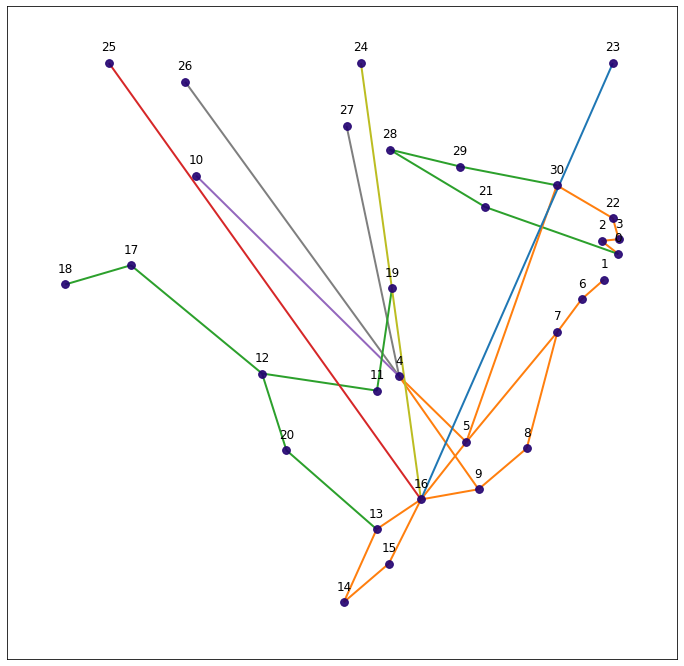

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pprint import pprint
from collections import defaultdict

node_dist_to_color = {
    1: "tab:red",
    2: "tab:orange",
    3: "tab:olive",
    4: "tab:green",
    5: "tab:blue",
    6: "tab:purple",
    7: "tab:gray",
}

# larger figure size
plt.figure(3,figsize=(12,12)) 
# some math labels
G = nx.read_graphml('Rnp.graphml.xml')

#Link = (G.edges(data='LinkLabel'))
#for i in range(G.number_of_edges(G)):

Links = nx.get_edge_attributes(G,'LinkLabel').values()


cores = []

for key in Links:
  if (key == '20Gbps'):
    cores.append(node_dist_to_color[1])
  elif(key=='10Gbps'):
    cores.append(node_dist_to_color[2])
  elif(key=='3.5Gbps'):
    cores.append(node_dist_to_color[3])
  elif (key == '3Gbps'):
    cores.append(node_dist_to_color[4])
  elif (key == '1.45Gbps'):
    cores.append(node_dist_to_color[5])
  elif(key=='200Mbps'):
    cores.append(node_dist_to_color[6])
  elif(key=='20Mbps'):
    cores.append(node_dist_to_color[7])

label_dic = dict(list(G.nodes(data="label")))

Latitude = (list(G.nodes(data="Latitude")))
Longitude = (list(G.nodes(data="Longitude")))

#pprint(Latitude)

pos={}
poslabel={}
for i in range(G.number_of_nodes()):
  pos[str(i)]= [float(Longitude[i][1]), float(Latitude[i][1])]
  poslabel[str(i)]= [float(Longitude[i][1]), float(Latitude[i][1]+1)]

nx.draw_networkx_edges(G, pos,edge_color=cores, width=2)
#Now only add labels to the nodes you require (the hubs in my case)
nx.draw_networkx_labels(G, poslabel)
nx.draw_networkx_nodes(G, pos, node_size=60, node_color="#210070", alpha=0.9)
#print ("")
centralidade = nx.edge_load_centrality(G)
#betweenness = nx.edge_betweenness_centrality(Gnew,  weight='capacity')

pprint(centralidade)
print('**********************************')
ordenados = sorted(centralidade.items(), key=lambda x: x[1])   

#alguns = list(filter(lambda x: x[1] > 90, ordenados))


pprint(ordenados)



plt.show()

#plt.show()
#nx.write_graphml_xml(G,"saida.xml")
